# Exercise 1
### Parts (i-iii)

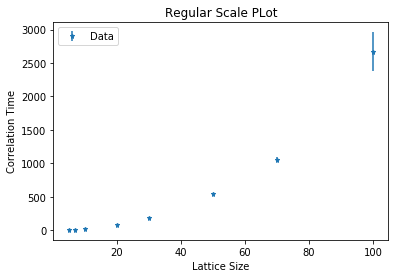

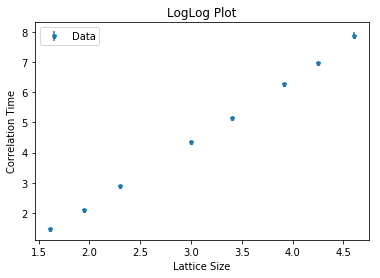

      fun: 6.7613168452711765
 hess_inv: array([[ 8.45075132e-04, -2.76249321e-04],
       [-2.76249321e-04,  9.68234177e-05]])
      jac: array([0.00000000e+00, 7.80820847e-06])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([-1.96051826,  2.10468649]) 

chisq_min/dof =  0.42258230282944853
Q =  0.9775918837843665 

'a' and 'b' values respectivly:
[ -1.96051846 2.10468657 ]
[-1.96051826  2.10468649]


In [17]:
%matplotlib inline
import math
import numpy as np 
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit, minimize
from scipy.special import gammaincc

#Reading in the data
def pullData(dataSet = 'power_law_data.txt'):
    f = open(dataSet) 
    data = []
    for line in f:
        data_line = line.rstrip().split(' ')
        data.append(data_line)
    L = []
    tau = []
    tauError = []
    for line in data: 
        L.append(float(line[0]))
        tau.append(float(line[1]))
        tauError.append(float(line[2]))
    return [L, tau, tauError]

#Regular plot of data with error bars
def plotData(dataSet = 'power_law_data.txt'):
    data = pullData(dataSet)
    lattice = data[0]
    tauTime = data[1]
    tauErr = data[2]
    plt.errorbar(lattice, tauTime, yerr = tauErr, fmt = '*', markersize = 5, label="Data")
    plt.subplot(111)
    plt.xlabel("Lattice Size")
    plt.ylabel("Correlation Time")
    plt.title("Regular Scale PLot")
    plt.legend(loc="upper left")
    plt.show()
plotData()

#Loglog plot with error bars
def plotLogLogData(dataSet = 'power_law_data.txt'):
    data = pullData(dataSet)
    lattice = np.log(data[0])
    tauTime = np.log(data[1])
    tauErr = np.array(data[2])/np.array(data[1])
    plt.errorbar(lattice, tauTime, yerr = tauErr, fmt = 'p', markersize = 5, label="Data")
    plt.subplot(111)
    plt.xlabel("Lattice Size")
    plt.ylabel("Correlation Time")
    plt.title("LogLog Plot")
    plt.legend(loc="upper left")
    plt.show()
plotLogLogData()

#Linear fit of data from Loglog plot minimizing chi-squared
def chisq(params, dataSet = 'power_law_data.txt'):
    a,b = params
    data = pullData(dataSet)
    lattice = np.log(data[0])
    tauTime = np.log(data[1])
    tauErr = np.array(data[2])/np.array(data[1])
    return np.sum( (a + b*lattice - tauTime)**2/tauErr**2 )

initialGuess = [8,1]
print(minimize(chisq,initialGuess),"\n")

#Goodness of fit measures
def goodFit(dataSet = 'power_law_data.txt'):
    dof = len(dataSet) - 2
    chisq_min = minimize(chisq, initialGuess).fun
    print("chisq_min/dof = ", chisq_min/dof)
    print("Q = ", gammaincc(dof/2, chisq_min/2),"\n")
goodFit()

#Using the explicit formulas
def analyticalForms(dataSet = 'power_law_data.txt'):
    bestFit = minimize(chisq, initialGuess).x
    data = pullData(dataSet)
    lattice = np.log(data[0])
    tauTime = np.log(data[1])
    tauErr = np.array(data[2])/np.array(data[1])
    S = np.sum(1/tauErr/tauErr)
    Sx = np.sum(lattice/tauErr/tauErr)
    Sy = np.sum(tauTime/tauErr/tauErr)
    t = (lattice-Sx/S)/tauErr
    Stt = np.sum(t*t)
    b = np.sum(t*tauTime/tauErr)/Stt
    a = (Sy-Sx*b)/S
    print("'a' and 'b' values respectivly:")
    print('[ %.8f' % a, '%.8f' % b, ']')
    print(bestFit)
analyticalForms()

### Parts (iv-vi)

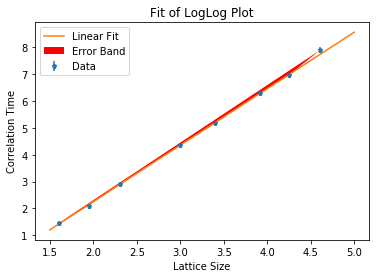

In [19]:
#Plot of Loglog data and fit together
def fitLogLog(dataSet = 'power_law_data.txt'):
    data = pullData(dataSet)
    lattice = np.log(data[0])
    tauTime = np.log(data[1])
    tauErr = np.array(data[2])/np.array(data[1])
    plt.errorbar(lattice, tauTime, yerr = tauErr, fmt = 'p', markersize = 5, label="Data")
    bestFit = minimize(chisq, initialGuess).x
    x_for_plot = np.linspace(1.5, 5, 100)
    plt.plot(x_for_plot, bestFit[0] + bestFit[1]*x_for_plot, label="Linear Fit")
    plt.fill(lattice, tauTime, 'r', label="Error Band")
    plt.title("Fit of LogLog Plot")
    plt.xlabel("Lattice Size")
    plt.ylabel("Correlation Time")
    plt.legend(loc="upper left")
    plt.show()
fitLogLog()

Best fit parameters:  [0.13471708 2.11677552 0.16630038]
Errors on fit parameters:  [0.01137187 0.02506142 0.27678113]


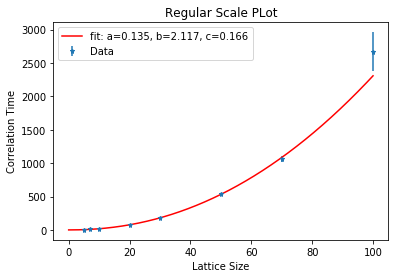

In [15]:
#Non-linear fit of original data set
def powFunc(x, a, b, c):
    return a*x**b + c

def plotNonLinData(func = powFunc, dataSet = 'power_law_data.txt'):
    data = pullData(dataSet)
    lattice = data[0]
    tauTime = data[1]
    tauErr = data[2]
    x4Plot = np.linspace(0, 100, 1000)
    plt.errorbar(lattice, tauTime, yerr = tauErr, fmt = '*', markersize = 5, label="Data")
    
    # do the nonlinear fit (to the true function) using scipy.optimize.curve_fit
    popt, pcov = curve_fit(func, lattice, tauTime, sigma = tauErr, absolute_sigma=True)
    print("Best fit parameters: ", popt)
    print("Errors on fit parameters: ", np.sqrt(np.diag(pcov)))

    plt.plot(x4Plot, func(x4Plot, popt[0]*np.ones(1000),
                     popt[1]*np.ones(1000),
                     popt[2]*np.ones(1000)), 'r-',
                    label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    
    plt.xlabel("Lattice Size")
    plt.ylabel("Correlation Time")
    plt.title("Regular Scale PLot")
    plt.legend(loc="upper left")
    plt.show()
plotNonLinData()